# Présentation du jeu de données - KC HOUSE DATA

![Ville](img/seattle.jpg)

Le jeu de données donnent des informations sur les prix de biens immobiliers dans le comté de King County dont le siège est Seattle (sur la côte Ouest des Etats-Unis).

On y retrouve les informations suivantes :

![Description](img/description.jpg)

# Nettoyage

In [228]:
#Importation librairies
import pandas as pd
import numpy as np


In [229]:
# Régler l'affichage
pd.set_option('display.max_columns', None)

In [230]:
# Importation des données et visualisation 
df = pd.read_csv('kc_house_data.csv') 
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570      7242     2.0           0     0          3      7   
2              770     10000     1.0           0     0          3      6   
3             1960      5000     1.0           0     0          5      7   
4             1680      8080     1.0           0     0          3      8   
...            ...       ...     ...         ...   ...        ...    ...   
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [231]:
#Suppression de la colonne "id"
df = df.drop(['id'], axis = 1)

In [232]:
#Nom des colonnes
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [233]:
#Traitement des doublons
print(df.duplicated().sum())

0


In [234]:
#Traitement des valeurs manquantes
print(df.isnull().sum()) 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [235]:
#Attributs
df.dtypes
# (ou df.info())

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [236]:
#Taille de la matrice
print(df.shape)

(21613, 20)


In [237]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Distribution des features

In [238]:
#Importation librairies pour visualisations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

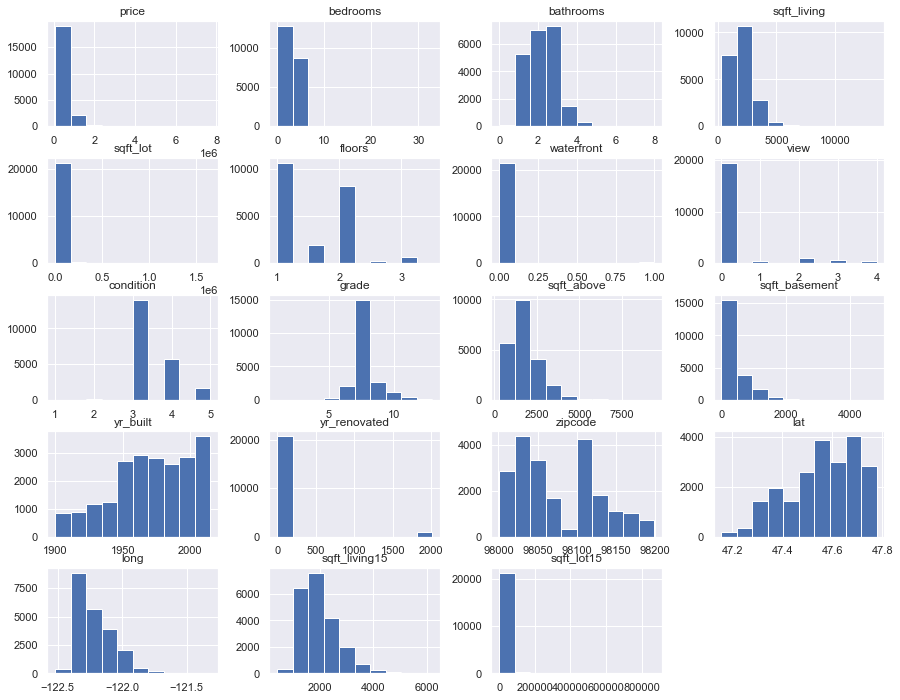

In [239]:
#Histogrammes sans log

df.hist(figsize = (15,12))
plt.show()

## Etude du prix (target)

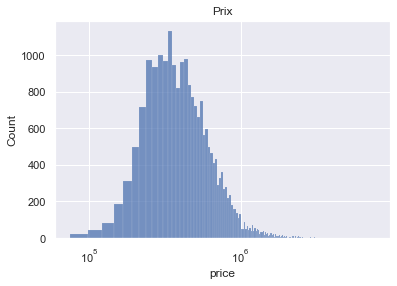

In [240]:
# Prix - Distribution
sns.histplot(data=df, x='price')
plt.title('Prix')
plt.xscale('log')
plt.show()

Analyse : Se rapproche d'une distribution normale avec quelques valeurs extrêmes

In [241]:
# Recherche valeurs aberrantes sur les prix
df.sort_values(by= 'price', ascending=True)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1149   20150217T000000    75000.0         1       0.00          670     43377   
15293  20140506T000000    78000.0         2       1.00          780     16344   
465    20140523T000000    80000.0         1       0.75          430      5050   
16198  20150324T000000    81000.0         2       1.00          730      9975   
8274   20141105T000000    82000.0         3       1.00          860     10426   
...                ...        ...       ...        ...          ...       ...   
1448   20150413T000000  5350000.0         5       5.00         8000     23985   
4411   20140804T000000  5570000.0         5       5.75         9200     35069   
9254   20140919T000000  6885000.0         6       7.75         9890     31374   
3914   20140611T000000  7062500.0         5       4.50        10040     37325   
7252   20141013T000000  7700000.0         6       8.00        12050     27600   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
1149      1.0           0     0          3      3         670              0   
15293     1.0           0     0          1      5         780              0   
465       1.0           0     0          2      4         430              0   
16198     1.0           0     0          1      5         730              0   
8274      1.0           0     0          3      6         860              0   
...       ...         ...   ...        ...    ...         ...            ...   
1448      2.0           0     4          3     12        6720           1280   
4411      2.0           0     0          3     13        6200           3000   
9254      2.0           0     4          3     13        8860           1030   
3914      2.0           1     2          3     11        7680           2360   
7252      2.5           0     3          4     13        8570           3480   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1149       1966             0    98022  47.2638 -121.906           1160   
15293      1942             0    98168  47.4739 -122.280           1700   
465        1912             0    98014  47.6499 -121.909           1200   
16198      1943             0    98168  47.4808 -122.315            860   
8274       1954             0    98146  47.4987 -122.341           1140   
...         ...           ...      ...      ...      ...            ...   
1448       2009             0    98004  47.6232 -122.220           4600   
4411       2001             0    98039  47.6289 -122.233           3560   
9254       2001             0    98039  47.6305 -122.240           4540   
3914       1940          2001    98004  47.6500 -122.214           3930   
7252       1910          1987    98102  47.6298 -122.323           3940   

       sqft_lot15  
1149        42882  
15293       10387  
465          7500  
16198        9000  
8274        11250  
...           ...  
1448        21750  
4411        24345  
9254        42730  
3914        25449  
7252         8800  

[21613 rows x 20 columns]

Analyse : Les prix vont de 75 000$ à 7 700 000$, un range assez large...
On décide d'étudier plus en profondeur les valeurs extrêmes.

In [242]:
# Prix - Etude des valeurs extrêmes
from sklearn.preprocessing import StandardScaler
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis])
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('Distribution basse extrême:')
print(low_range)
print('\nDistribution haute extrême:')
print(high_range)

Distribution basse extrême:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

Distribution haute extrême:
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_5784/1027436821.py:3: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Analyse : Quelques valeurs extrêmes, mais rien qui ne semble à priori "aberrant"

## Etude des features

### Etude de la date

In [243]:
#Etude de la date
df_date = df.copy()

In [244]:
# Fonction de ventes par mois
def sale_month(df):
    df['sale_month'] = pd.DatetimeIndex(df['date']).month
    return df

df_date = sale_month(df_date)

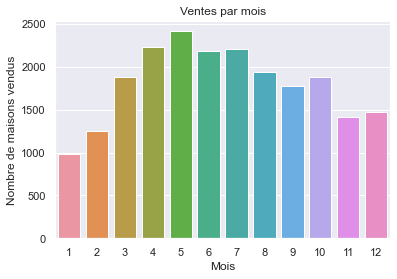

In [245]:
#Visualisation

sns.countplot(x = df_date['sale_month'], data = df_date)
plt.title('Ventes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de maisons vendus')
plt.show()

In [246]:
# Transformation de la date
df['date'] = pd.to_datetime(df['date'])
df.dtypes
# Modification des dates en jour écoulé depuis la date la plus ancienne
df['date'] = (df['date'] - df['date'].min()).dt.days
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   164  221900.0         3       1.00         1180      5650     1.0   
1   221  538000.0         3       2.25         2570      7242     2.0   
2   299  180000.0         2       1.00          770     10000     1.0   
3   221  604000.0         4       3.00         1960      5000     1.0   
4   292  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

###  Etude de Bedrooms

On a vu un "max" de 33 chambres dans le describe, ce qui semble beaucoup. On cherche à en savoir davantage...

In [247]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [248]:
df[df['bedrooms'] == 33]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15870    54  640000.0        33       1.75         1620      6000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15870           0     0          5      7        1040            580   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15870      1947             0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15870        4700

Analyse : Les 33 chambres semblent très incohérentes avec le reste des données (nombre de salles de bains, prix, m² habitables)
On décide de supprimer cette sample qui semble être une valeur aberrante.

In [249]:
df.drop( df[ (df['bedrooms'] == 33)].index, inplace=True)

#On pouvait aussi remplacer le nombre de chambres en supposant que c'était une erreur de frappe
# df.loc[15856, 'bedrooms'] = 3


In [250]:
df[df['bedrooms'] == 11]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8757   111  520000.0        11        3.0         3000      4960     2.0   

      waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
8757           0     0          3      7        2400            600      1918   

      yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
8757          1999    98106  47.556 -122.363           1420        4960

In [251]:
df[df['bedrooms'] == 10]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
13314   104  1148000.0        10       5.25         4590     10920     1.0   
15161   180   650000.0        10       2.00         3610     11914     2.0   
19254   241   660000.0        10       3.00         2920      3745     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
13314           0     2          3      9        2500           2090   
15161           0     0          4      7        3010            600   
19254           0     0          4      7        1860           1060   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
13314      2008             0    98004  47.5861 -122.113           2730   
15161      1958             0    98006  47.5705 -122.175           2040   
19254      1913             0    98105  47.6635 -122.320           1810   

       sqft_lot15  
13314       10400  
15161       11914  
19254        3745

Analyse : Exceptée la maison à 33 chambres, les autres extrêmes hautes ne semblent pas incohérentes, on les laisse donc ainsi.

In [252]:
df[df['bedrooms'] == 0]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
875      41  1095000.0         0       0.00         3064      4764     3.5   
3119    279   380000.0         0       0.00         1470       979     3.0   
3467     95   288000.0         0       1.50         1430      1650     3.0   
4868    153   228000.0         0       1.00          390      5900     1.0   
6994     53  1295650.0         0       0.00         4810     28008     2.0   
8477    199   339950.0         0       2.50         2290      8319     2.0   
8484    146   240000.0         0       2.50         1810      5669     2.0   
9773    362   355000.0         0       0.00         2460      8049     2.0   
9854    235   235000.0         0       0.00         1470      4800     2.0   
12653   292   320000.0         0       2.50         1490      7111     2.0   
14423   346   139950.0         0       0.00          844      4269     1.0   
18379   180   265000.0         0       0.75          384    213444     1.0   
19452   147   142000.0         0       0.00          290     20875     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
875             0     2          3      7        3064              0   
3119            0     2          3      8        1470              0   
3467            0     0          3      7        1430              0   
4868            0     0          2      4         390              0   
6994            0     0          3     12        4810              0   
8477            0     0          3      8        2290              0   
8484            0     0          3      7        1810              0   
9773            0     0          3      8        2460              0   
9854            0     0          3      7        1470              0   
12653           0     0          3      7        1490              0   
14423           0     0          4      7         844              0   
18379           0     0          3      4         384              0   
19452           0     0          1      1         290              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
875        1990             0    98102  47.6362 -122.322           2360   
3119       2006             0    98133  47.7145 -122.356           1470   
3467       1999             0    98125  47.7222 -122.290           1430   
4868       1953             0    98118  47.5260 -122.261           2170   
6994       1990             0    98053  47.6642 -122.069           4740   
8477       1985             0    98042  47.3473 -122.151           2500   
8484       2003             0    98038  47.3493 -122.053           1810   
9773       1990             0    98031  47.4095 -122.168           2520   
9854       1996             0    98065  47.5265 -121.828           1060   
12653      1999             0    98065  47.5261 -121.826           1500   
14423      1913             0    98001  47.2781 -122.250           1380   
18379      2003             0    98070  47.4177 -122.491           1920   
19452      1963             0    98024  47.5308 -121.888           1620   

       sqft_lot15  
875          4000  
3119         1399  
3467         1650  
4868         6000  
6994        35061  
8477         8751  
8484         5685  
9773         8050  
9854         7200  
12653        4675  
14423        9600  
18379      224341  
19452       22850

Analyse : 13 maisons sans chambres, parfois grandes et parfois sans salles de bains...

- Pour les plus petites, on peut éventuellement penser qu'ils dorment dans une pièce commune (ex : canapé-lit dans le salon)

On décide donc de supprimer toutes celles qui n'ont pas de chambre et qui font plus de 700 sqft_living.

In [253]:
mask_bedroom = df['bedrooms'] == 0
mask_sqft_living = df['sqft_living'] > 700

df.drop( df[mask_bedroom & mask_sqft_living].index, inplace=True)

### Etude de Bathrooms

In [254]:
df[df['bathrooms'] == 0]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1149    291   75000.0         1        0.0          670     43377     1.0   
5832    186  280000.0         1        0.0          600     24501     1.0   
10481   139  484000.0         1        0.0          690     23244     1.0   
19452   147  142000.0         0        0.0          290     20875     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
1149            0     0          3      3         670              0   
5832            0     0          2      3         600              0   
10481           0     0          4      7         690              0   
19452           0     0          1      1         290              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1149       1966             0    98022  47.2638 -121.906           1160   
5832       1950             0    98045  47.5316 -121.749            990   
10481      1948             0    98053  47.6429 -121.955           1690   
19452      1963             0    98024  47.5308 -121.888           1620   

       sqft_lot15  
1149        42882  
5832        22549  
10481       19290  
19452       22850

Analyse : Il existe encore une maison sans chambres, ni salle de bain & 3 maisons avec une chambre mais sans salle de bain...
En regardant leurs prix, leurs conditions et leurs grades... On décide finalement de conserver les deux moins chers avec de mauvaises conditions qui peuvent plausiblement ne pas avoir de salles de bains. 
On supprimer les deux autres qui coûtent plus de 250 000$.

In [255]:
mask_bathroom = df['bathrooms'] == 0
mask_price = df['price'] > 250000

df.drop( df[mask_bathroom & mask_price].index, inplace=True)

### Etude sqft_living

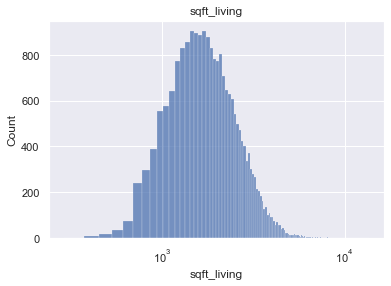

In [256]:
# Distribution - sqft_living

sns.histplot(data=df, x='sqft_living')
plt.title('sqft_living')
plt.xscale('log')
plt.show()

Analyse : Se rapproche beaucoup d'une distribution normale. Rien d'aberrant à signaler.

### Etude sqft_lot

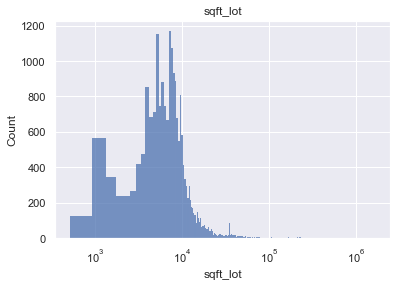

In [257]:
# Distribution - sqft_lot

sns.histplot(data=df, x='sqft_lot')
plt.title('sqft_lot')
plt.xscale('log')
plt.show()

Analyse : Distribution un peu moins normale, mais qui peut peut-être s'expliquer suivant les secteurs (centre-ville ou éloigné)

### Etude de yr_renovated

In [258]:
df['yr_renovated'].value_counts()

0       20686
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Analyse : Beaucoup d'années à "0" qui pourraient fausser le jeu de données...
On décide de remplacer les 0 par les années de construction, ce qui veut aussi dire qu'elles n'ont pas eu de rénovations.

In [259]:
#Remplacement des années de rénovation égalent à 0 par l'année de construction
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']

### Etude de la zone géographique

C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_5784/1030170144.py:14: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



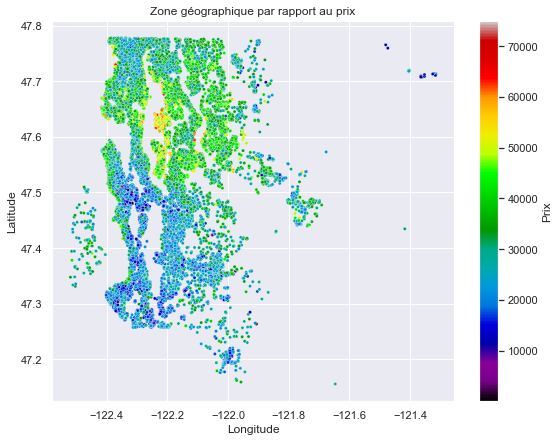

In [260]:
#Etude lattitude / longitude

df_zg = df.copy()
df_zg['price_log'] = np.log(df_zg['price'])

plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df_zg['long'], y = df_zg['lat'], hue = df_zg['price_log'],
                palette = 'nipy_spectral',s=10, legend = None, data = df_zg)

norm = plt.Normalize(df_zg['price'].min(), df_zg['price_log'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'Prix')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zone géographique par rapport au prix')
plt.show()


In [261]:
import plotly.express as px

fig = px.scatter_mapbox(df_zg, lat="lat", lon="long",     color="price_log", size="sqft_living",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': -122, 'lat': 47 },
        'zoom': 5},
    showlegend = False,
    height=800)

fig.show()

Analyse : On voit que la lattitude semble plus importante que la longitude sur cette map.

In [262]:
# Etude du zipcode
df_zg['zipcode'].value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [263]:
# Les quartiers les plus chers

df_zip = df[['zipcode', 'price']]
df_zip = df_zip.groupby(df_zip['zipcode']).median()
df_zip.sort_values(by='price', ascending=False)

price
zipcode           
98039    1892500.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
...            ...
98188     264000.0
98001     260000.0
98032     249000.0
98002     235000.0
98168     235000.0

[70 rows x 1 columns]

### Nouvelles features possibles

On décide de créer une nouvelle colonne "récent ou rénové récemment" (dans les 14 dernières années) qui pourra peut-être servir

In [264]:
# Ajout d'une colonne "récent et/ou rénové récemment" (booléen)
def renovated_recent(df):
    df['renovated_recent'] = df['yr_renovated'].map(lambda x: 1 if x > 1990 else 0)
    return df

In [265]:
df = renovated_recent(df)

On décider de créer une nouvelle colonne "avec sous-sol" qui pourra peut-être servir

In [266]:
# Nouvelle colonne "sous-sol"
df['basement_boolean'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

C:\Users\Apprenant\anaconda3\envs\devia\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



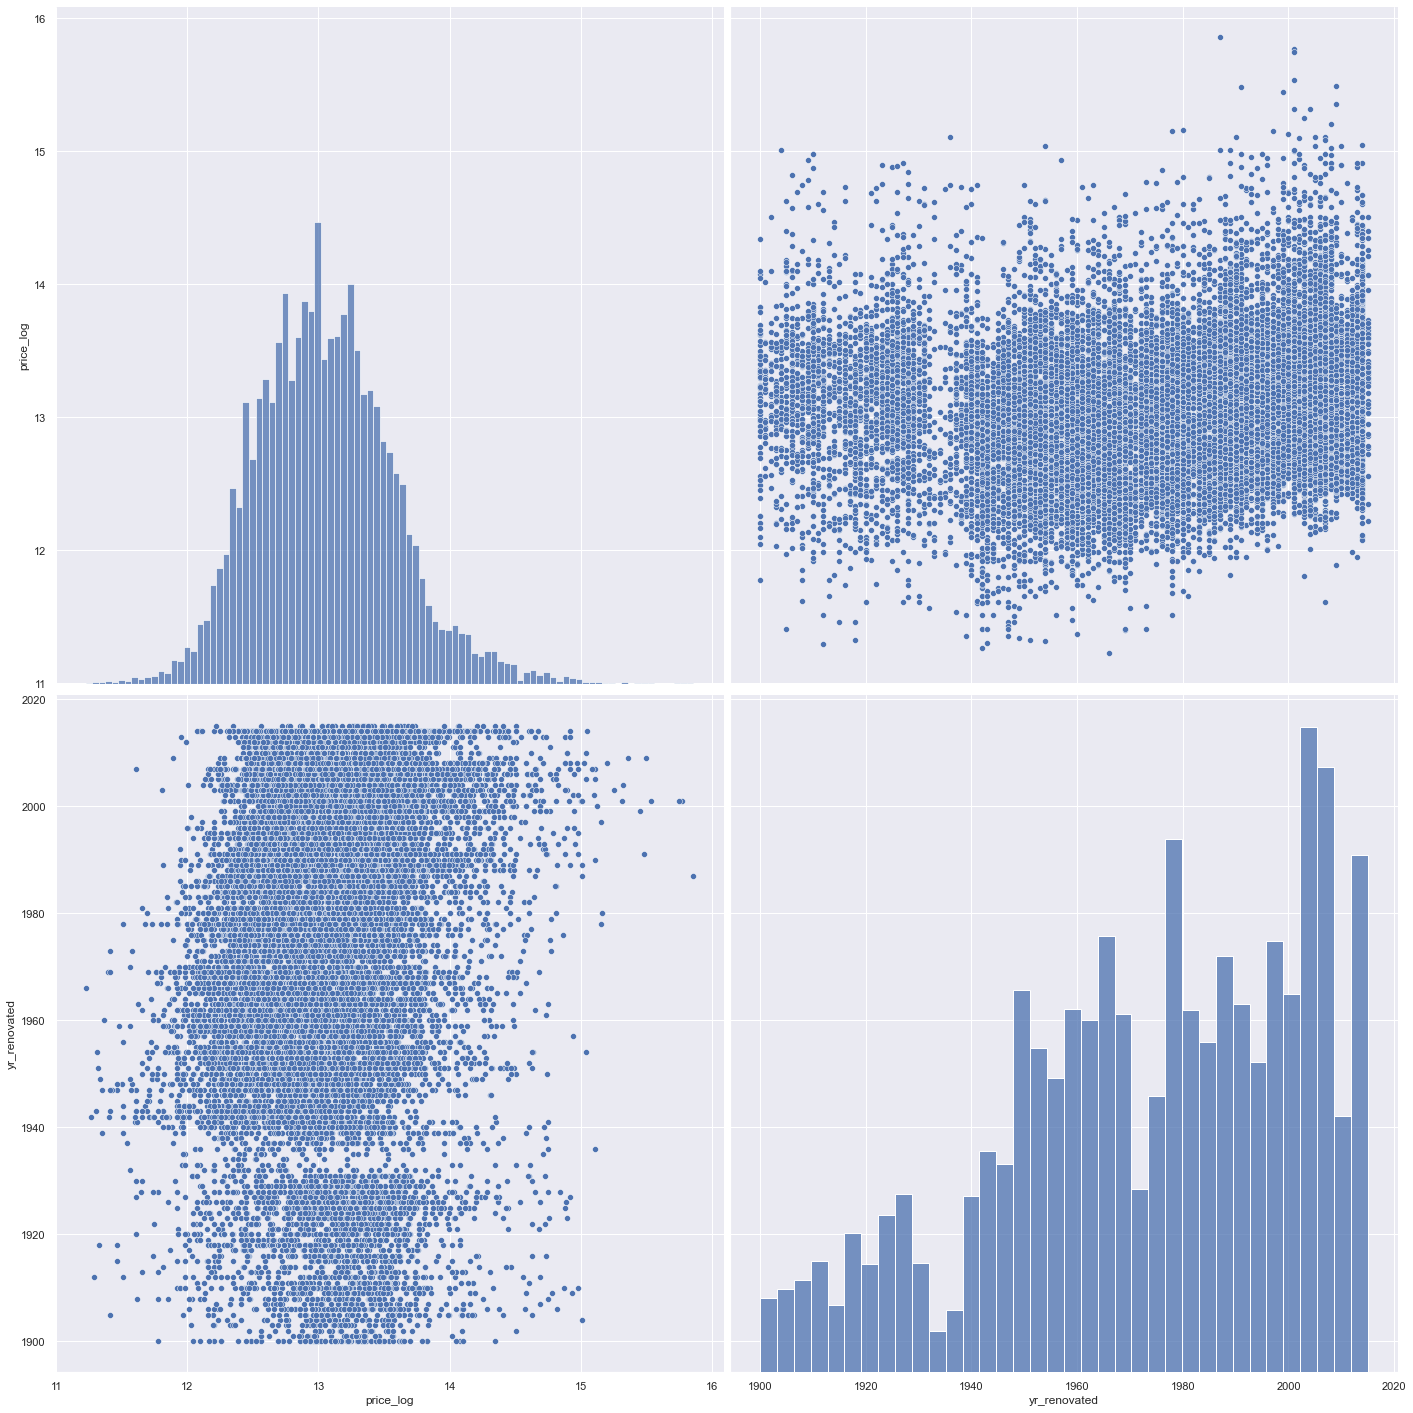

In [276]:
# On analyse les corrélations entre le prix de vente et l'année de rénovation
sns.set()
cols = ['price_log', 'yr_renovated' ]
sns.pairplot(df_zg[cols], size = 10)
plt.show()

On décide de créer une colonne par périodes de construction/rénovation

In [268]:
#Year built en catégorie par périodes
def renovation_period(df):
    
    # Define bins based on statistics
    yr_built_bins = [1899, 1940, 1980, 2020]
    yr_built_labels = [2, 1, 3]
    
    # Map to bins using pd.cut()
    df['renovation_period'] = pd.cut(df['yr_renovated'], bins = yr_built_bins, labels = yr_built_labels)
    
    return df

df = renovation_period(df)

On décide de créer une colonne "vue sur mer"

In [269]:
# Nouvelle colonne "vue sur mer"
df['view_on_the_sea'] = (df['view'] + (df['waterfront']*2))

In [275]:
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       164  221900.0         3       1.00         1180      5650     1.0   
1       221  538000.0         3       2.25         2570      7242     2.0   
2       299  180000.0         2       1.00          770     10000     1.0   
3       221  604000.0         4       3.00         1960      5000     1.0   
4       292  510000.0         3       2.00         1680      8080     1.0   
...     ...       ...       ...        ...          ...       ...     ...   
21608    19  360000.0         3       2.50         1530      1131     3.0   
21609   297  400000.0         4       2.50         2310      5813     2.0   
21610    52  402101.0         2       0.75         1020      1350     2.0   
21611   259  400000.0         3       2.50         1600      2388     2.0   
21612   166  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955          1955    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933          1933    98028  47.7379 -122.233           2720   
3          1965          1965    98136  47.5208 -122.393           1360   
4          1987          1987    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009          2009    98103  47.6993 -122.346           1530   
21609      2014          2014    98146  47.5107 -122.362           1830   
21610      2009          2009    98144  47.5944 -122.299           1020   
21611      2004          2004    98027  47.5345 -122.069           1410   
21612      2008          2008    98144  47.5941 -122.299           1020   

       sqft_lot15  renovated_recent  basement_boolean renovation_period  \
0            5650                 0                 0                 1   
1            7639                 1                 1                 3   
2            8062                 0                 0                 2   
3            5000                 0                 1                 1   
4            7503                 0                 0                 3   
...           ...               ...               ...               ...   
21608        1509                 1                 0                 3   
21609        7200                 1                 0                 3   
21610        2007                 1                 0                 3   
21611        1287                 1                 0                 3   
21612        1357                 1                 0                 3   

       view_on_the_sea  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
21608                0  
21609                0  
21610                0  
21611                0  
21612                0  

[21600 rows x 24 columns]

# Etude de corrélations entre les variables

### Corrélation des features avec la target (prix)

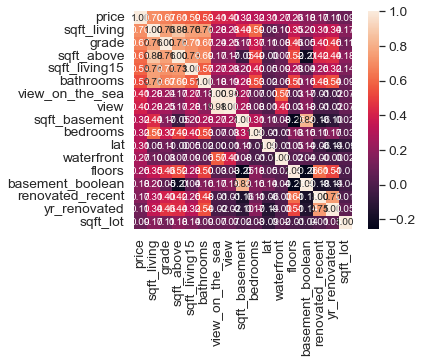

In [270]:
# Matrice montrant les variables les plus corrélées avec le prix à partir du coin haut-gauche
k = 17
correlation = df.corr()
cols = correlation.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Analyse :
La matrice nous montre les variables fortement corrélées au prix :
- sqft_living
- grade
- sqft_above
- sqft_living15 
- bathrooms
- view_on_the_sea 

<AxesSubplot:>

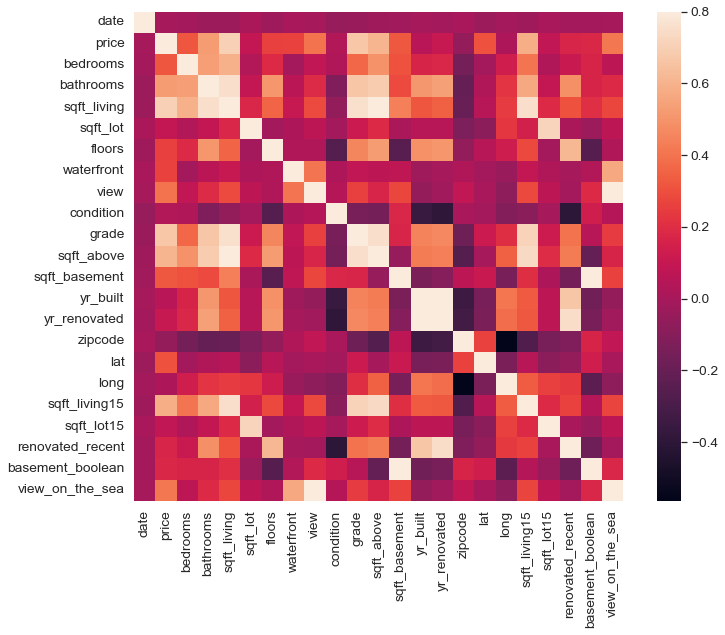

In [271]:
#Matrice de corrélation
correlation = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation, vmax=.8, square=True)

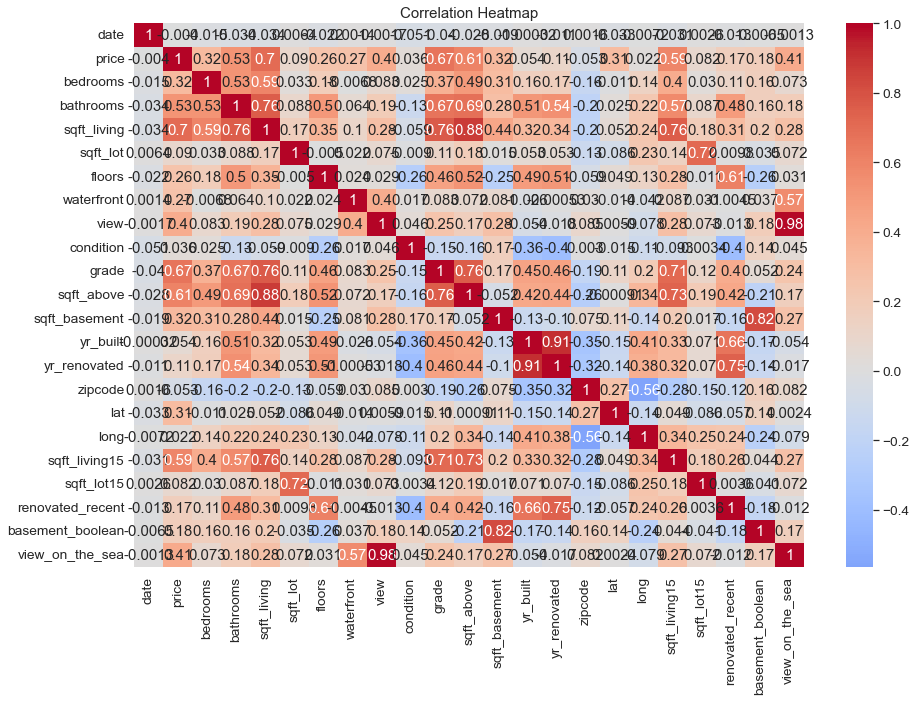

In [272]:
#Matrice avec valeurs
correlation = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Analyse :
- La colonne modifiée "yr_renovated" est devenue très corrélée avec "yr_built"
- La colonne créée "view_on_the_sea" est très corréelée avec "view"


C:\Users\Apprenant\anaconda3\envs\devia\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



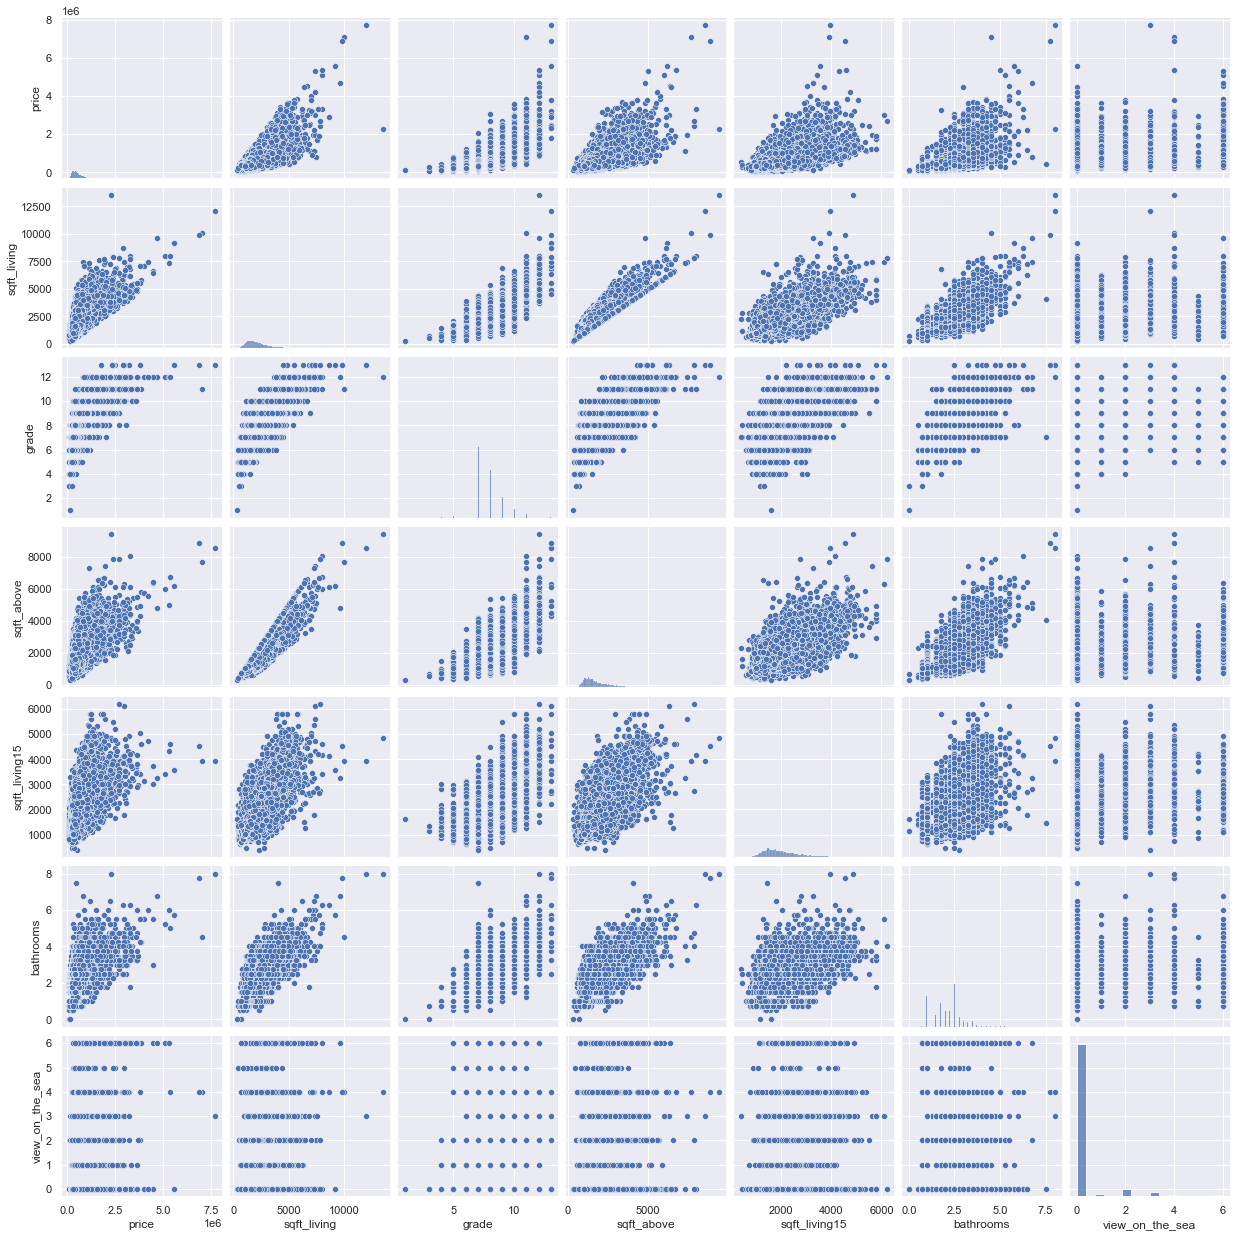

In [278]:
# On analyse les corrélations des plus fortes variables entre elles
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view_on_the_sea' ]
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [274]:
#Sauvegarde
df.to_csv('house_cleaned.csv', index=False)

Améliorations possibles :

- Date en catégories (par mois ? par saison ?)
- Nouvelle feature "types de maisons" en catégories (palace, familial, petite...)
- Nouvelle feature "nombre de pièces" (en considérant des moyennes sur internet + bedroomes/bathrooms et le nombre de m²)
- Nouvelle feature en rapport avec les espaces verts et "sightseeing"